In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report


In [ ]:
data = pd.read_csv('nifty_500.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [ ]:
data.head(10)

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84
5,Aditya Birla Capital Ltd.,ABCAPITAL,Financial Services,EQ,89.00,90.60,88.35,89.40,90.25,0.85,0.95,2401323,2.151826e+08,139.20,85.60,-23.75,-11.57
6,Aditya Birla Fashion and Retail Ltd.,ABFRL,Consumer Services,EQ,235.60,243.50,235.60,237.05,242.20,5.15,2.17,1014277,2.435482e+08,322.00,189.35,9.87,-12.62
7,Aditya Birla Sun Life AMC Ltd.,ABSLAMC,Financial Services,EQ,400.05,406.70,400.00,400.05,405.90,5.85,1.46,34489,1.390183e+07,722.90,375.00,-,-5.09
8,ACC Ltd.,ACC,Construction Materials,EQ,2122.95,2174.00,2122.95,2121.95,2171.70,49.75,2.34,284645,6.136206e+08,2589.00,1900.00,5.32,-3.48
9,Adani Enterprises Ltd.,ADANIENT,Metals & Mining,EQ,2189.90,2242.00,2138.25,2190.90,2229.25,38.35,1.75,2141743,4.695579e+09,2420.95,1332.75,45.33,1.08


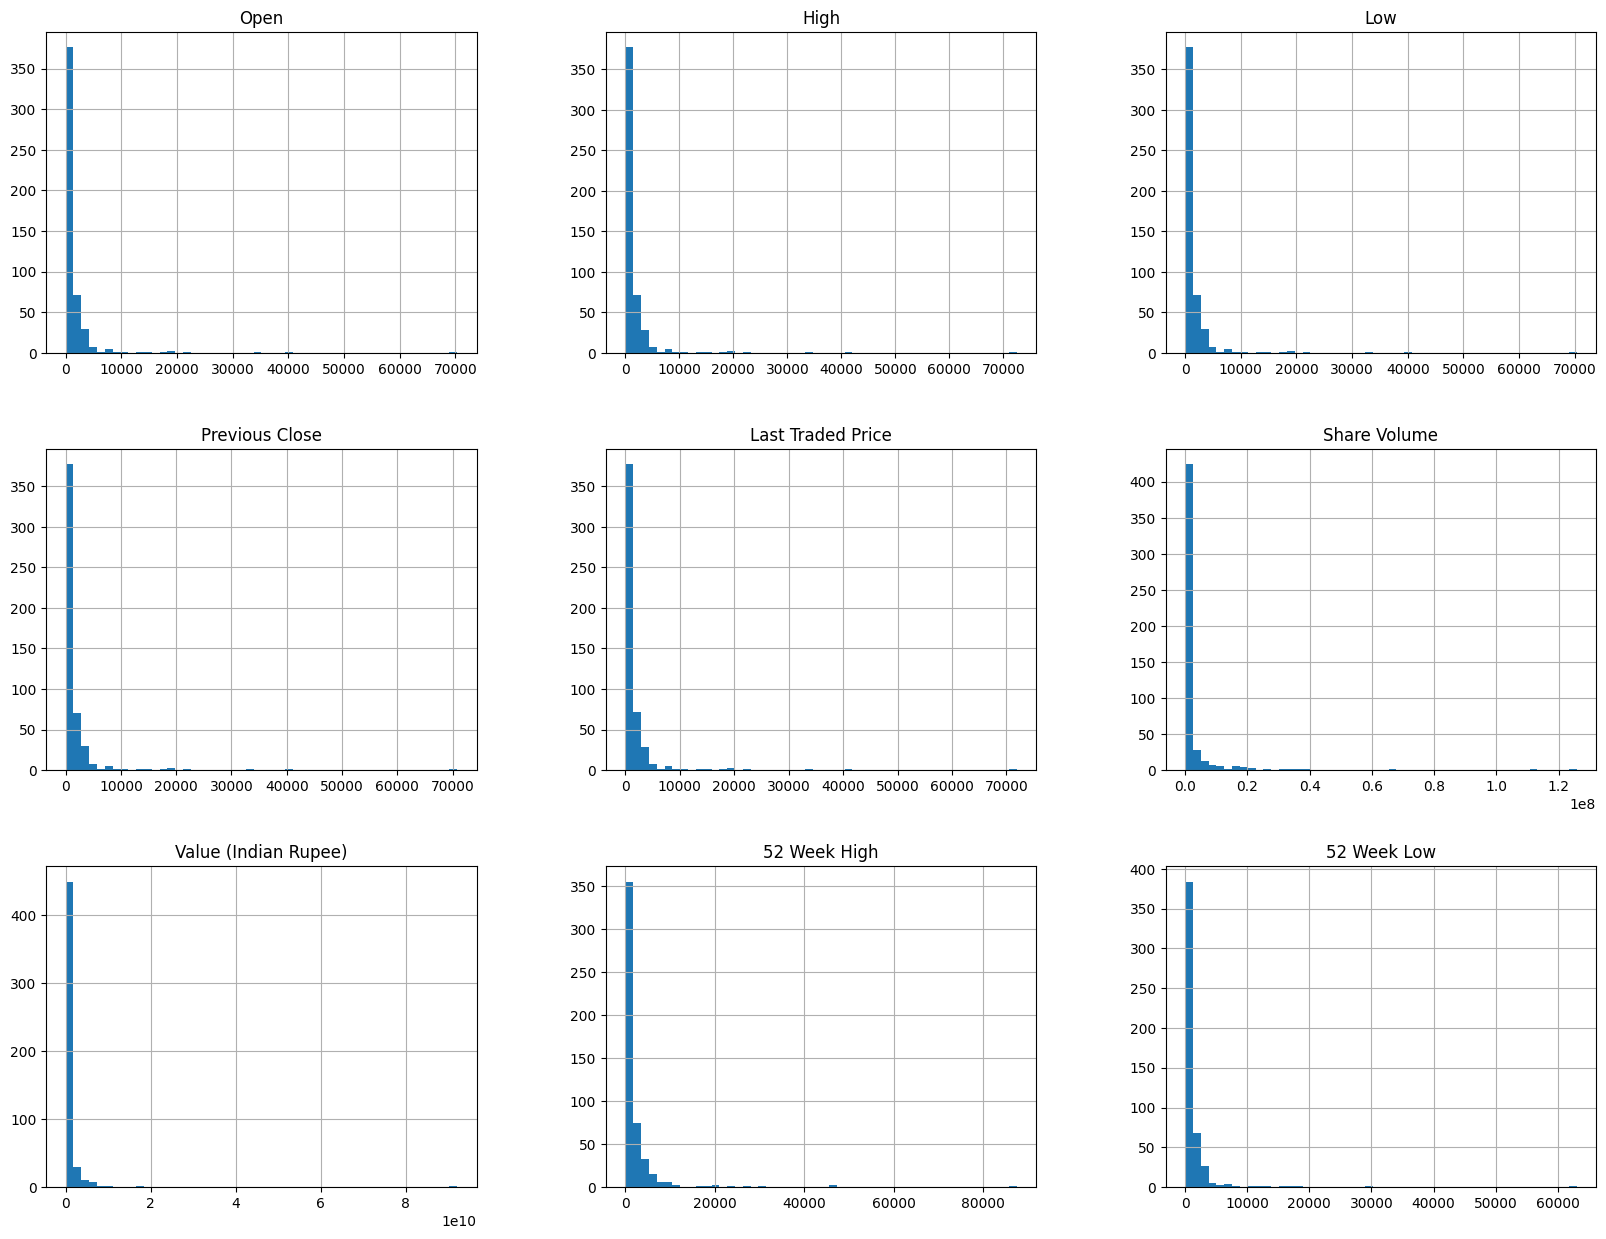

In [ ]:
data.hist(bins = 50, figsize=(20,15))
#need to write "plt.show()" if using VS Code
plt.show()

In [ ]:
data['Last Traded Price']

,Last Traded Price
0,21575.00
1,400.00
2,1943.15
3,2280.00
4,19199.80
...,...
496,270.00
497,7680.00
498,56.00
499,364.00


In [ ]:
data["Series"]

,Series
0,EQ
1,EQ
2,EQ
3,EQ
4,EQ
...,...
496,EQ
497,EQ
498,EQ
499,EQ


In [ ]:
data.dropna(inplace=True)

In [ ]:
encoder = LabelEncoder()
data['Industry'] = encoder.fit_transform(data['Industry'])
data['Series'] = encoder.fit_transform(data['Series'])

In [ ]:
ftrs = ['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change', 'Share Volume']
X = data[ftrs]
yR = data['Last Traded Price']
# y = (data['Percentage Change'] > 0).astype(int)
data['Percentage Change'] = pd.to_numeric(data['Percentage Change'], errors='coerce')

yC = (data['Percentage Change'] > 0).astype(int)

In [ ]:
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = pd.to_numeric(X[column].str.replace('-', ''), errors='coerce')

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<ipython-input-14-1539fb6f0805>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = pd.to_numeric(X[column].str.replace('-', ''), errors='coerce')
<ipython-input-14-1539fb6f0805>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # Replace NaNs with column means


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_scaled, yR, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, yC, test_size=0.2, random_state=42)

In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train_reg)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report

# y_pred_reg = reg_model.predict(X_test)
# rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
# mae = mean_absolute_error(y_test_reg, y_pred_reg)

y1 = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_reg, y1))
mae = mean_absolute_error(y_test_reg, y1)


In [ ]:
print(f"Regression Model - RMSE is: {rmse:.4f} and MAE: {mae:.4f}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test_reg, y1)
print(f"Regression Model - R² Score: {r2:.2f}")

Regression Model - RMSE is: 29.8511 and MAE: 12.5319
Regression Model - R² Score: 1.00


In [ ]:
#1 is coming in R² so model has overfitted itself

In [ ]:
c1 = SVC(kernel='linear')
c1.fit(X_train_cls, y_train_cls)

SVC(kernel='linear')

In [ ]:
from sklearn.svm import SVC
y1m = SVC(kernel='linear')
y1m.fit(X_train_cls, y_train_cls)

SVC(kernel='linear')

In [ ]:
y_class = c1.predict(X_test_cls)
accuracy = accuracy_score(y_test_cls, y_class)

In [ ]:
print(f"classficatiin accuracy: {accuracy:.2f}")


classficatiin accuracy: 0.50


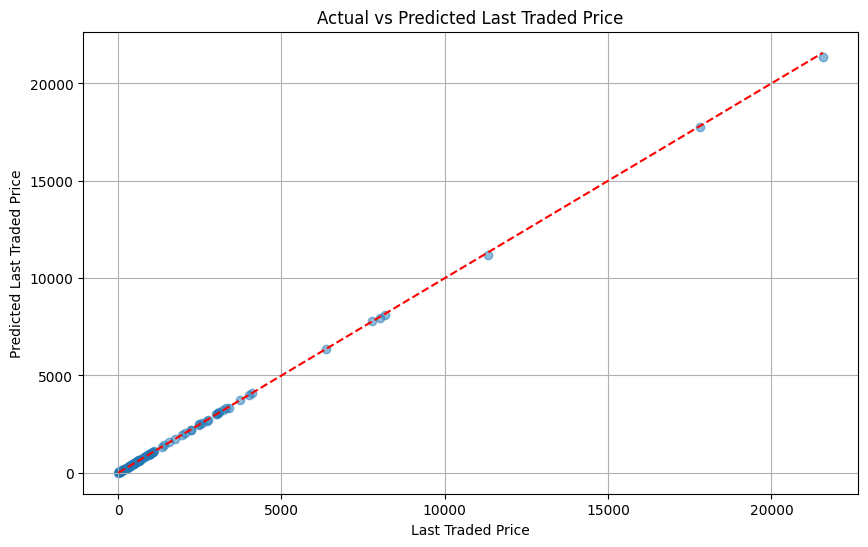

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y1, alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.xlabel("Last Traded Price")
plt.ylabel("Predicted Last Traded Price")
plt.title("Actual vs Predicted Last Traded Price")
plt.grid(True)
plt.show()
